In [237]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [238]:
# Study data files
df_unemployment_rate = pd.read_csv('data/Unemployment_Rate.csv')
df_unemployment_high_school = pd.read_csv('data/Unemployment Rate - High School Graduates, No College, 25 Yrs. & over.csv')
df_unemployment_bachelors = pd.read_csv('data/Unemployment Rate - College Graduates - Bachelor\'s Degree, 25 to 34 years.csv')
df_unemployment_masters = pd.read_csv('data/Unemployment Rate - College Graduates - Master\'s Degree, 25 years and over.csv')
df_real_m2_money_stock = pd.read_csv('data/Real M2 Money Stock.csv')
df_real_gdp = pd.read_csv('data/Real GRoss Domestic Product.csv')
df_inflation_rate = pd.read_csv('data/Inflation_rate.csv')
df_food_drink_sales = pd.read_csv('data/Food_and_DrinkingPlaces_Retail_Sales.csv')
df_housing_prices = pd.read_csv('data/Consumer Prices Housing.csv')
df_medical_prices = pd.read_csv('data/Medical Price.csv')

In [239]:
# Rename 'DATE' to 'Date'
df_unemployment_rate.rename(columns={'DATE': 'Date'}, inplace=True)
df_unemployment_high_school.rename(columns={'DATE': 'Date'}, inplace=True)
df_unemployment_bachelors.rename(columns={'DATE': 'Date'}, inplace=True)
df_unemployment_masters.rename(columns={'DATE': 'Date'}, inplace=True)
df_real_m2_money_stock.rename(columns={'DATE': 'Date'}, inplace=True)
df_real_gdp.rename(columns={'DATE': 'Date'}, inplace=True)
df_inflation_rate.rename(columns={'DATE': 'Date'}, inplace=True)
df_food_drink_sales.rename(columns={'DATE': 'Date'}, inplace=True)
df_housing_prices.rename(columns={'DATE': 'Date'}, inplace=True)
df_medical_prices.rename(columns={'DATE': 'Date'}, inplace=True)

In [240]:
# Convert the 'Date' column to datetime format to facilitate merging
df_unemployment_rate['Date'] = pd.to_datetime(df_unemployment_rate['Date'])
df_unemployment_high_school['Date'] = pd.to_datetime(df_unemployment_high_school['Date'])
df_unemployment_bachelors['Date'] = pd.to_datetime(df_unemployment_bachelors['Date'])
df_unemployment_masters['Date'] = pd.to_datetime(df_unemployment_masters['Date'])
df_real_m2_money_stock['Date'] = pd.to_datetime(df_real_m2_money_stock['Date'])
df_real_gdp['Date'] = pd.to_datetime(df_real_gdp['Date'])
df_inflation_rate['Date'] = pd.to_datetime(df_inflation_rate['Date'])
df_food_drink_sales['Date'] = pd.to_datetime(df_food_drink_sales['Date'])
df_housing_prices['Date'] = pd.to_datetime(df_housing_prices['Date'])
df_medical_prices['Date'] = pd.to_datetime(df_medical_prices['Date'])

In [241]:
# Rename columns to avoid conflicts when merging
df_unemployment_rate.rename(columns={'UNRATE': 'General Unemployment Rate'}, inplace=True)
df_unemployment_high_school.rename(columns={'LNS14027660': 'High School Unemployment Rate'}, inplace=True)
df_unemployment_bachelors.rename(columns={'CGBD2534': 'Bachelor\'s Degree Unemployment Rate'}, inplace=True)
df_unemployment_masters.rename(columns={'CGMD25O': 'Master\'s Degree Unemployment Rate'}, inplace=True)
df_real_m2_money_stock.rename(columns={'M2REAL': 'Real M2 Money Stock'}, inplace=True)
df_real_gdp.rename(columns={'GDPC1': 'Real GDP'}, inplace=True)
df_inflation_rate.rename(columns={'T7YIEM': 'Inflation Rate'}, inplace=True)
df_food_drink_sales.rename(columns={'RSFSDP': 'Food and Drinking Places Retail Sales'}, inplace=True)
df_housing_prices.rename(columns={'CP0400USM086NEST': 'Housing Prices'}, inplace=True)
df_medical_prices.rename(columns={'CPIMEDSL': 'Medical Prices'}, inplace=True)

In [242]:
# Merge all DataFrames into a single one
df_combined = df_unemployment_rate.merge(df_unemployment_high_school, on='Date', how='outer')
df_combined = df_combined.merge(df_unemployment_bachelors, on='Date', how='outer')
df_combined = df_combined.merge(df_unemployment_masters, on='Date', how='outer')
df_combined = df_combined.merge(df_real_m2_money_stock, on='Date', how='outer')
df_combined = df_combined.merge(df_real_gdp, on='Date', how='outer')
df_combined = df_combined.merge(df_inflation_rate, on='Date', how='outer')
df_combined = df_combined.merge(df_food_drink_sales, on='Date', how='outer')
df_combined = df_combined.merge(df_housing_prices, on='Date', how='outer')
df_combined = df_combined.merge(df_medical_prices, on='Date', how='outer')


In [243]:
# Display the first rows of the combined DataFrame
df_combined.head()

,Date,General Unemployment Rate,High School Unemployment Rate,Bachelor's Degree Unemployment Rate,Master's Degree Unemployment Rate,Real M2 Money Stock,Real GDP,Inflation Rate,Food and Drinking Places Retail Sales,Housing Prices,Medical Prices
0,2018-01-01,4.0,4.5,2.5,2.3,5570.1,20044.077,2.00,59420.0,107.44,480.797
1,2018-02-01,4.1,4.4,2.3,2.2,5570.3,NaN,2.05,59687.0,107.91,481.600
2,2018-03-01,4.0,4.3,2.5,1.8,5592.7,NaN,2.06,60248.0,107.85,483.078
3,2018-04-01,4.0,4.3,2.2,1.6,5587.2,20150.476,2.10,59500.0,107.88,483.577
4,2018-05-01,3.8,3.9,2.1,1.7,5600.7,NaN,2.11,60839.0,108.38,484.543


In [244]:
# Save the combined DataFrame to a CSV file
df_combined.to_csv('data/combined_data.csv', index=False)

## Question 1: How has the general unemployment rate and the unemployment rate of college graduates with a bachelor's degree varied from 2018 to the present?

The general unemployment rate spiked sharply around March 2020, reaching a peak in April 2020, indicative of the initial impact of COVID-19, while the unemployment rate for college graduates with a bachelor's degree also increased, but not as dramatically as the general rate.

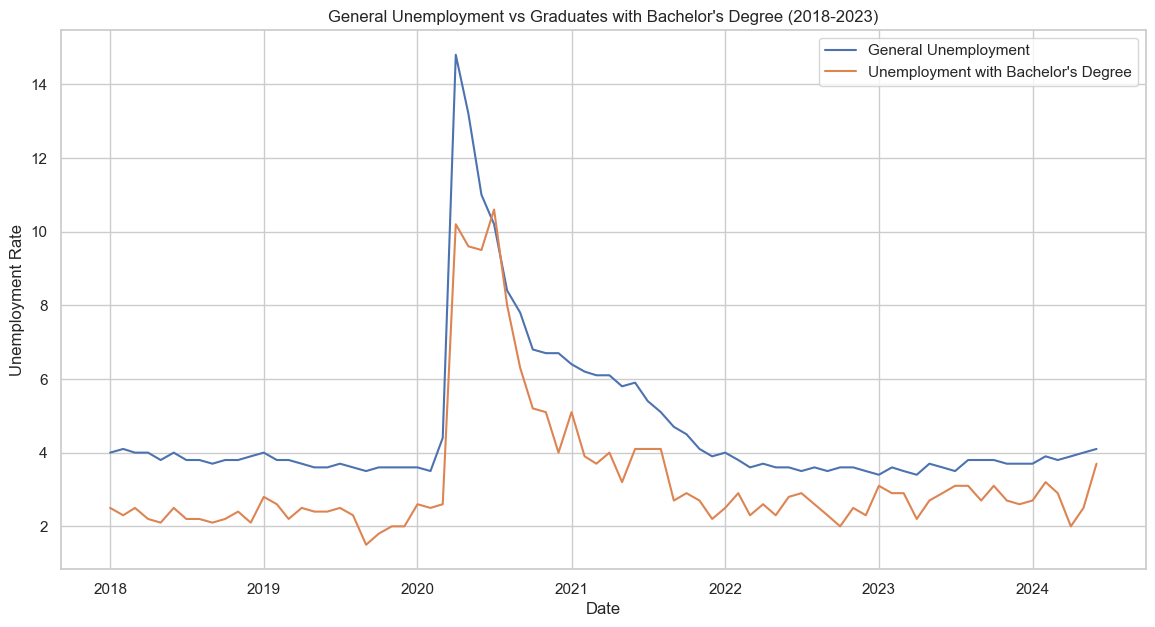

In [245]:
# Line plot for general unemployment rate and college graduates with bachelor's degree unemployment rate
plt.figure(figsize=(14, 7))
plt.plot(df_combined['Date'], df_combined['General Unemployment Rate'], label='General Unemployment')
plt.plot(df_combined['Date'], df_combined["Bachelor's Degree Unemployment Rate"], label='Unemployment with Bachelor\'s Degree')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('General Unemployment vs Graduates with Bachelor\'s Degree (2018-2023)')
plt.legend()
plt.grid(True)
plt.show()

## Question 2: What is the correlation between the real M2 money stock and the real Gross Domestic Product (GDP) during the COVID-19 period?
Correlation between Real M2 Money Stock and Real GDP:
There is a noticeable spread in the data points, suggesting some level of correlation between the real M2 money stock and real GDP, with the scatter plot indicating that increases in the money stock do not directly translate to proportional increases in GDP, especially during the pandemic period.

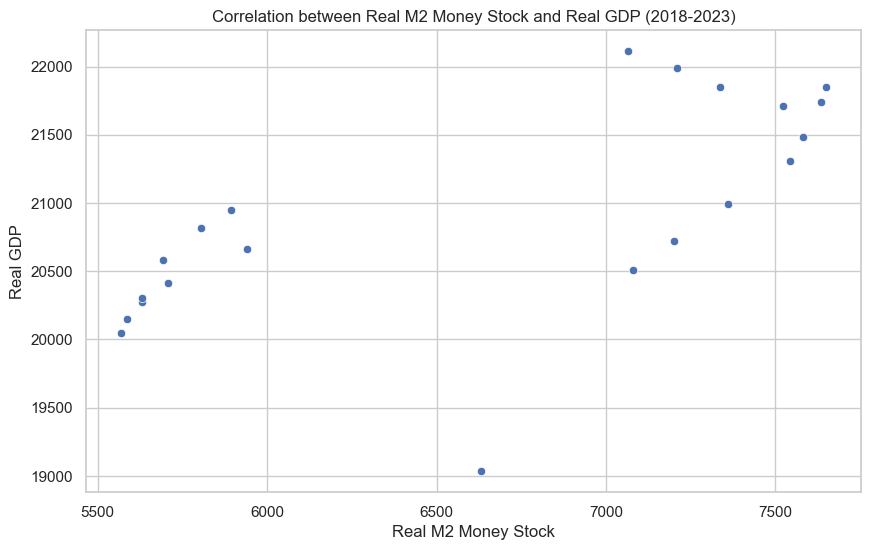

In [246]:

#Scatter plot for the correlation between real M2 money stock and real GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real M2 Money Stock', y='Real GDP', data=df_combined)
plt.xlabel('Real M2 Money Stock')
plt.ylabel('Real GDP')
plt.title('Correlation between Real M2 Money Stock and Real GDP (2018-2023)')
plt.grid(True)
plt.show()

# Question 3: How have housing prices and medical prices changed from 2018 to the present?
Housing Prices vs Medical Prices:
Both housing and medical prices have shown an upward trend since the start of the pandemic, with housing prices increasing more steadily, while medical prices exhibit a more volatile but overall increasing trend.

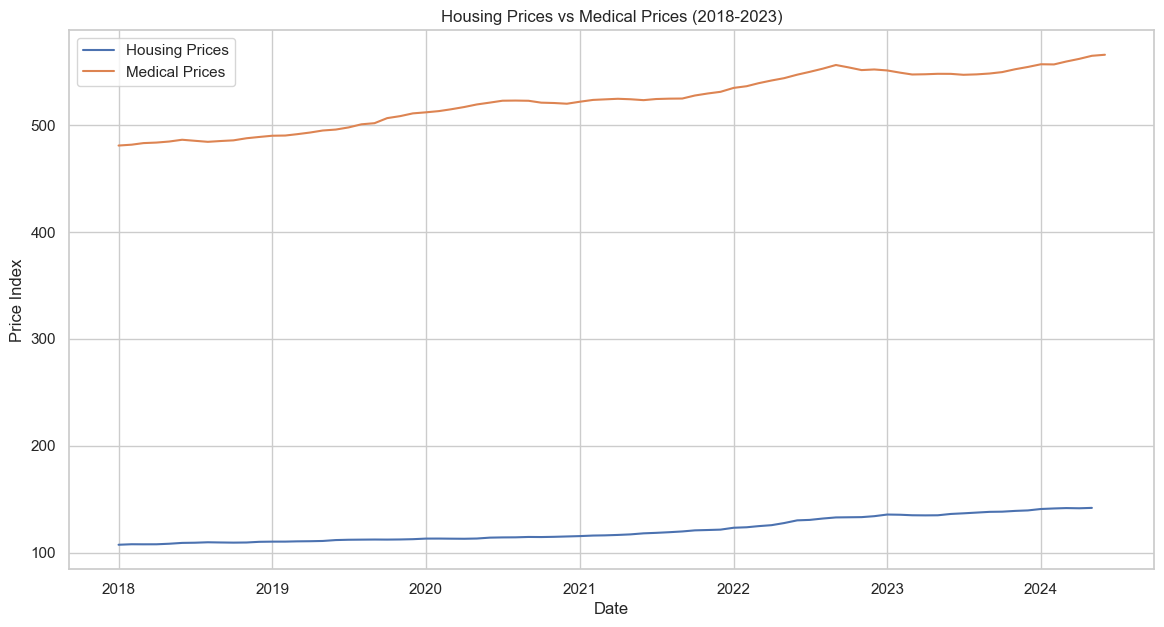

In [247]:
# Line plot for housing prices and medical prices
plt.figure(figsize=(14, 7))
plt.plot(df_combined['Date'], df_combined['Housing Prices'], label='Housing Prices')
plt.plot(df_combined['Date'], df_combined['Medical Prices'], label='Medical Prices')
plt.xlabel('Date')
plt.ylabel('Price Index')
plt.title('Housing Prices vs Medical Prices (2018-2023)')
plt.legend()
plt.grid(True)
plt.show()

# Question 4: What is the relationship between inflation and retail sales of food and drinking places during the pandemic period?

Relationship between Inflation and Retail Sales of Food and Drinking Places:
The scatter plot shows a weak relationship between inflation and retail sales of food and drinking places, as the retail sales have varied widely at different levels of inflation, suggesting other factors influencing these sales beyond just inflation.

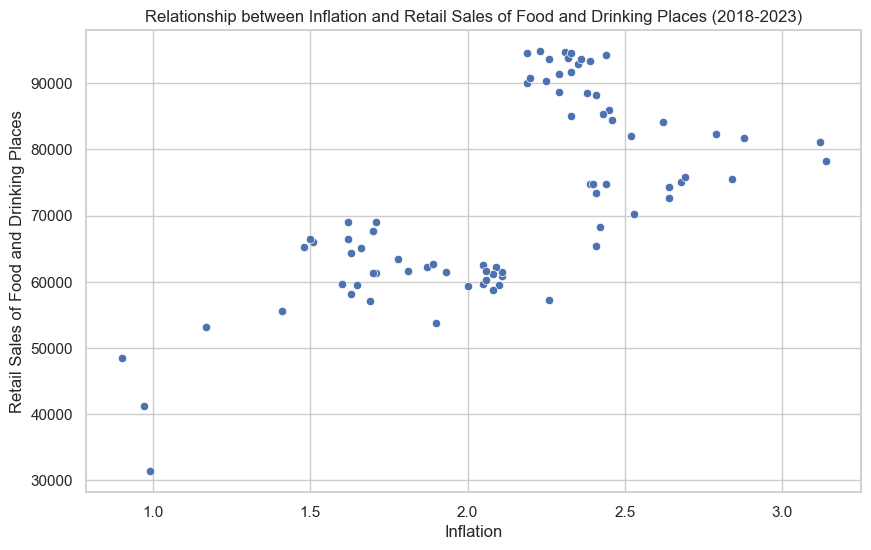

In [248]:
# Scatter plot for the relationship between inflation and retail sales of food and drinking places
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inflation Rate', y='Food and Drinking Places Retail Sales', data=df_combined)
plt.xlabel('Inflation')
plt.ylabel('Retail Sales of Food and Drinking Places')
plt.title('Relationship between Inflation and Retail Sales of Food and Drinking Places (2018-2023)')
plt.grid(True)
plt.show()

# Question 5: How has the unemployment rate for high school graduates without college education compared to the unemployment rate of graduates with a master's degree?
High School Unemployment Rate vs Master's Degree Unemployment Rate:
The unemployment rate for high school graduates without a college education increased significantly more than that for individuals with a master’s degree, indicating that lower educational attainment was more negatively impacted by the pandemic in terms of unemployment.

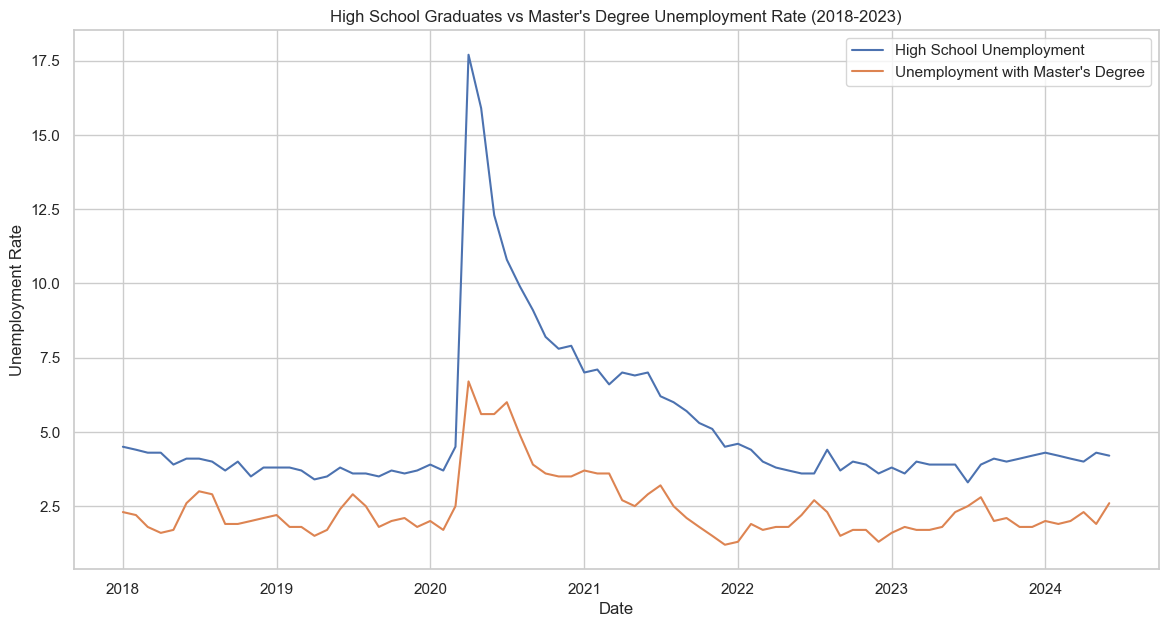

In [249]:
# Line plot for unemployment rate of high school graduates vs graduates with a master's degree
plt.figure(figsize=(14, 7))
plt.plot(df_combined['Date'], df_combined['High School Unemployment Rate'], label='High School Unemployment')
plt.plot(df_combined['Date'], df_combined["Master's Degree Unemployment Rate"], label='Unemployment with Master\'s Degree')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('High School Graduates vs Master\'s Degree Unemployment Rate (2018-2023)')
plt.legend()
plt.grid(True)
plt.show()

# Question 6: What has been the trend in retail sales of food and drinking places and the real M2 money stock from 2018 to the present?
Retail Sales of Food and Drinking Places vs Real M2 Money Stock:
Both the retail sales of food and drinking places and the real M2 money stock have increased since the start of the pandemic, showing a visible correlation that indicates increased money supply may have supported retail sales during the pandemic.

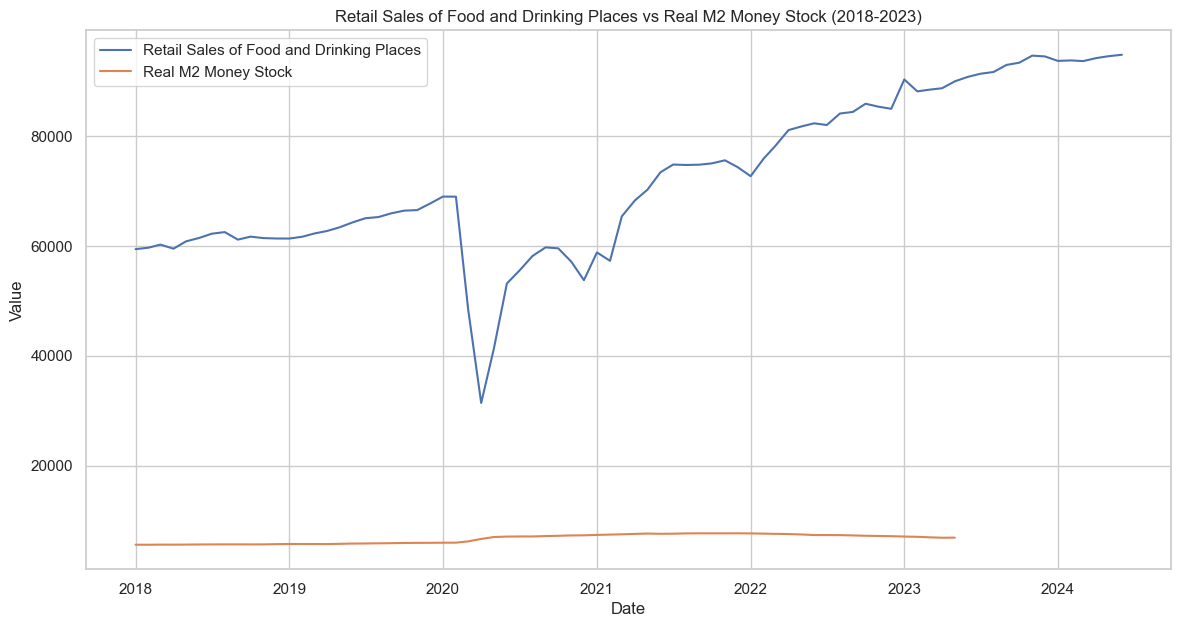

In [250]:
# Line plot for retail sales of food and drinking places and real M2 money stock
plt.figure(figsize=(14, 7))
plt.plot(df_combined['Date'], df_combined['Food and Drinking Places Retail Sales'], label='Retail Sales of Food and Drinking Places')
plt.plot(df_combined['Date'], df_combined['Real M2 Money Stock'], label='Real M2 Money Stock')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Retail Sales of Food and Drinking Places vs Real M2 Money Stock (2018-2023)')
plt.legend()
plt.grid(True)
plt.show()

# Question 7: How have housing prices and inflation fluctuated during the pandemic?
Housing Prices vs Inflation:
Both housing prices and inflation have shown a steady increase since the start of the pandemic, with the correlation suggesting that rising housing costs may be a contributing factor to the overall inflation rate.

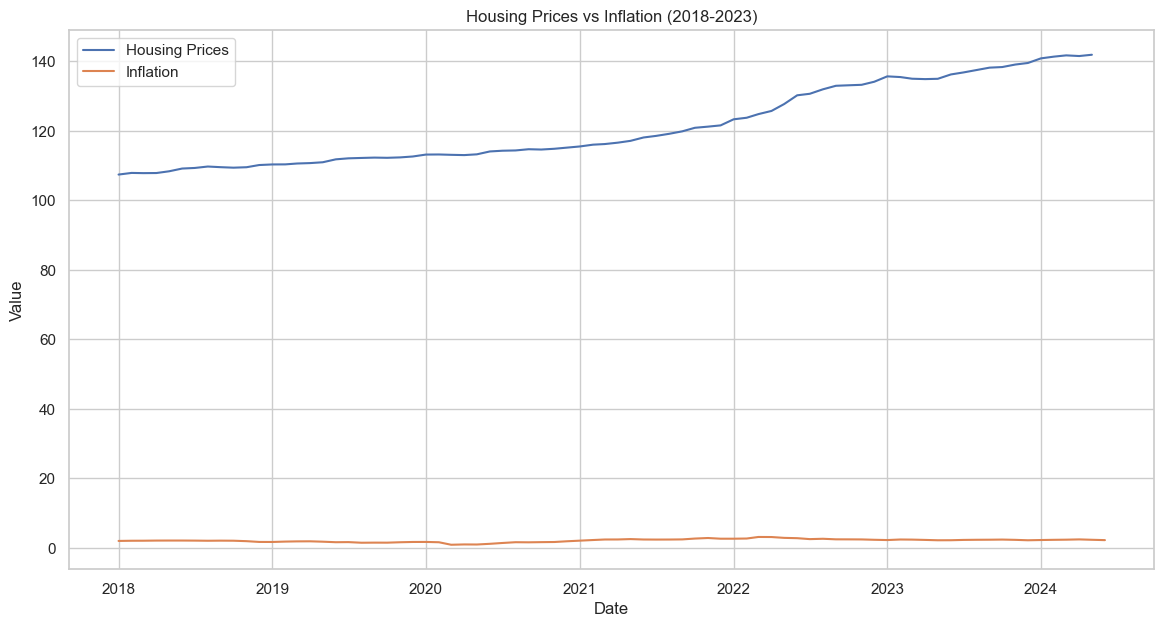

In [251]:
# Line plot for housing prices and inflation
plt.figure(figsize=(14, 7))
plt.plot(df_combined['Date'], df_combined['Housing Prices'], label='Housing Prices')
plt.plot(df_combined['Date'], df_combined['Inflation Rate'], label='Inflation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Housing Prices vs Inflation (2018-2023)')
plt.legend()
plt.grid(True)
plt.show()

# Question 8: What impact did COVID-19 have on real GDP and unemployment rates at different education levels?
Impact of COVID-19 on Real GDP and Unemployment Rates:
Real GDP experienced a significant drop in the second quarter of 2020, followed by a gradual recovery, while unemployment rates across all educational levels spiked in early 2020, with the highest impact seen in general and high school unemployment rates.



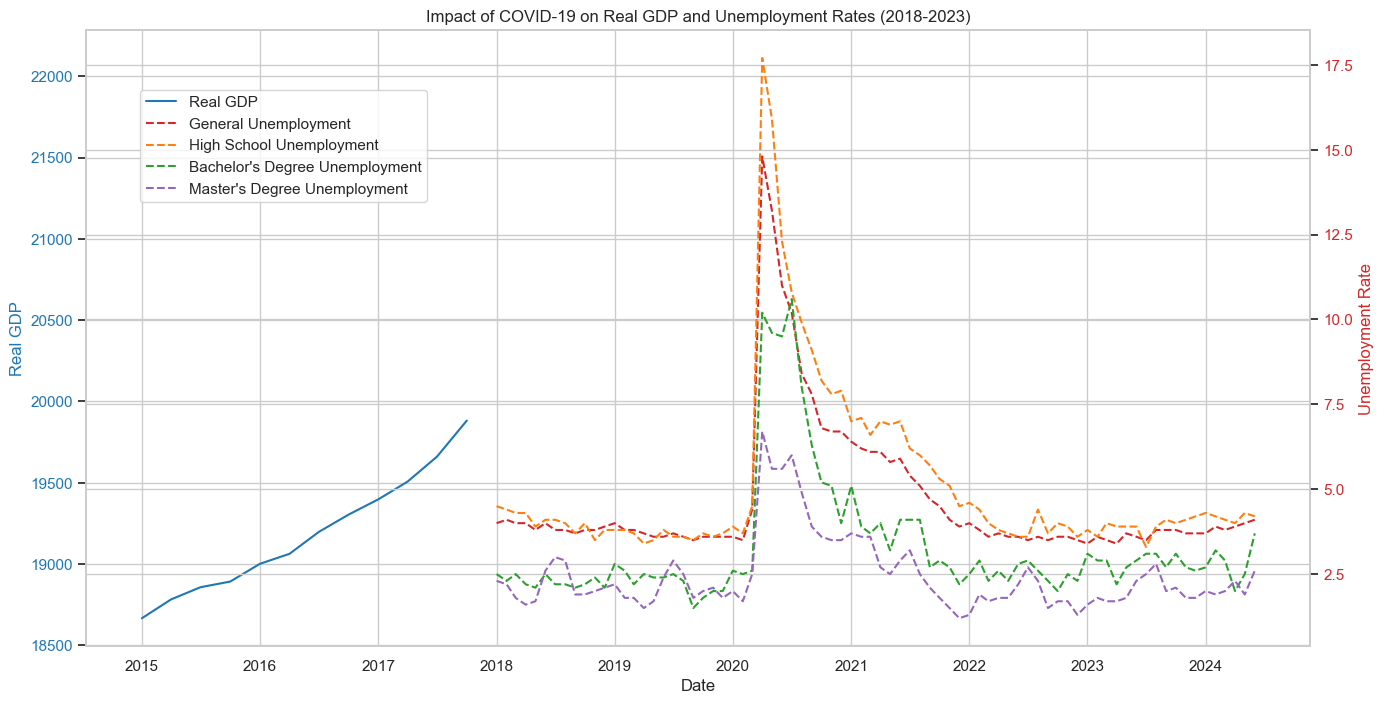

In [252]:
# Bar plot for the impact of COVID-19 on real GDP and unemployment rates at different education levels
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Real GDP', color='tab:blue')
ax1.plot(df_combined['Date'], df_combined['Real GDP'], color='tab:blue', label='Real GDP')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Unemployment Rate', color='tab:red')
ax2.plot(df_combined['Date'], df_combined['General Unemployment Rate'], color='tab:red', linestyle='--', label='General Unemployment')
ax2.plot(df_combined['Date'], df_combined["High School Unemployment Rate"], color='tab:orange', linestyle='--', label='High School Unemployment')
ax2.plot(df_combined['Date'], df_combined["Bachelor's Degree Unemployment Rate"], color='tab:green', linestyle='--', label='Bachelor\'s Degree Unemployment')
ax2.plot(df_combined['Date'], df_combined["Master's Degree Unemployment Rate"], color='tab:purple', linestyle='--', label='Master\'s Degree Unemployment')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Impact of COVID-19 on Real GDP and Unemployment Rates (2018-2023)')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.grid(True)
plt.show()

# Question 9: How have medical prices and retail sales of food and drinking places evolved since the beginning of the pandemic?
Medical Prices vs Retail Sales of Food and Drinking Places:
Medical prices have shown a steady increase during the pandemic, while retail sales of food and drinking places initially dropped and then recovered, indicating differing impacts of the pandemic on essential services (medical) versus consumer behavior (retail food and drink).

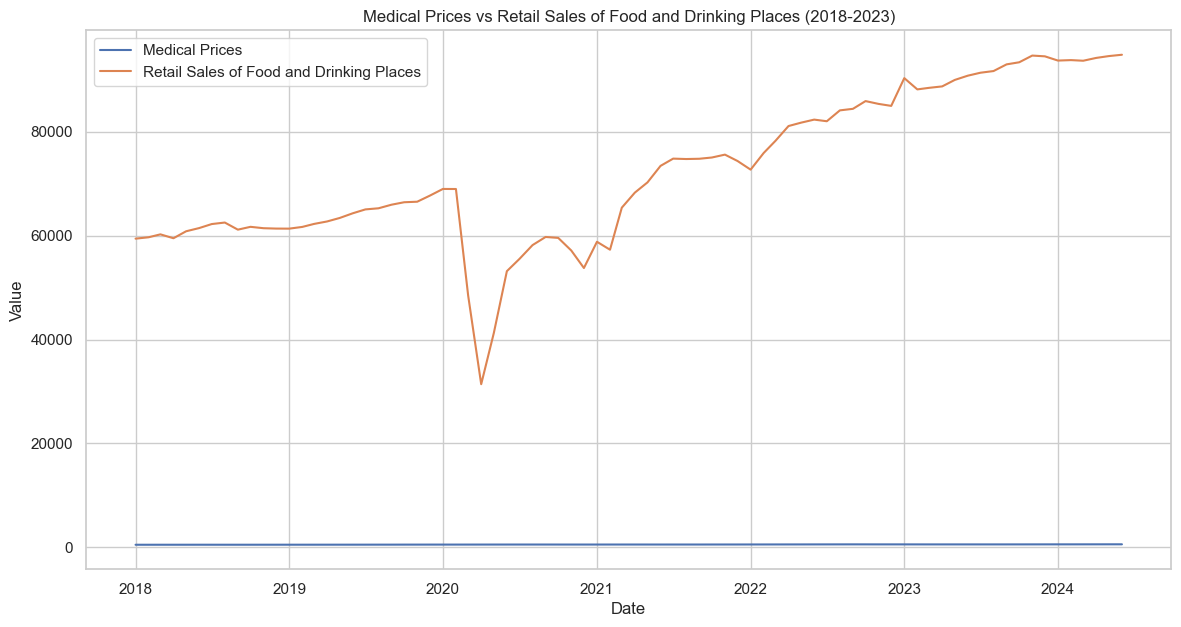

In [253]:
# Line plot for medical prices and retail sales of food and drinking places
plt.figure(figsize=(14, 7))
plt.plot(df_combined['Date'], df_combined['Medical Prices'], label='Medical Prices')
plt.plot(df_combined['Date'], df_combined['Food and Drinking Places Retail Sales'], label='Retail Sales of Food and Drinking Places')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Medical Prices vs Retail Sales of Food and Drinking Places (2018-2023)')
plt.legend()
plt.grid(True)
plt.show()